# Exploratory Data Analysis: Supermarket

In [1]:
# Importing a library for mathematical operations.

import numpy as np

# Importing a library for data manipulation.

import pandas as pd

# Importing libraries for data visualization.

import matplotlib.pyplot as plt
import seaborn as sns

# Importing a library for warning filtration.

from warnings import filterwarnings
filterwarnings("ignore")

## Data Collection

In [2]:
# Reading data into a Pandas DataFrame.

data = pd.read_csv("Data.csv")

In [3]:
# Printing first five rows of data.

data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,1/5/19,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,3/8/19,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,3/3/19,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,1/27/19,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,2/8/19,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Data Cleaning

In [4]:
# Printing number of duplicate rows.

data.duplicated().sum()

3

In [5]:
# Dropping duplicate rows.

data.drop_duplicates(inplace=True)

In [6]:
# Printing number of missing values in each column.

data.isna().sum()

Invoice ID                  0
Branch                      0
City                        0
Customer type              79
Gender                      0
Product line               43
Unit price                  6
Quantity                   19
Tax 5%                      0
Total                       0
Date                        0
Time                        0
Payment                     0
cogs                        0
gross margin percentage     0
gross income                0
Rating                      0
dtype: int64

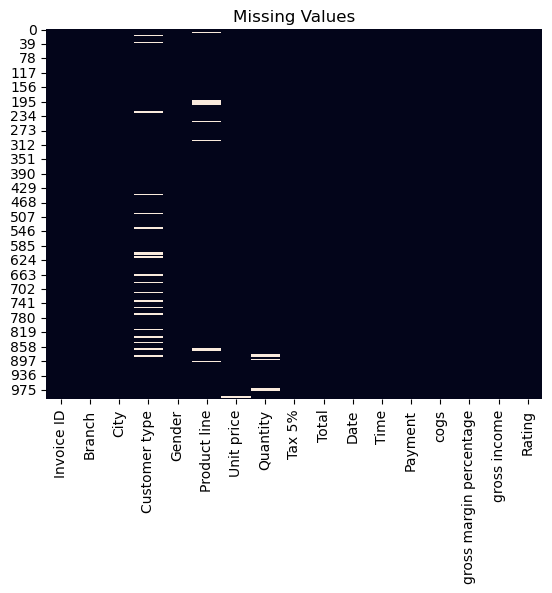

In [7]:
# Plotting a heatmap for missing values.

sns.heatmap(data.isna(), cbar=False)
plt.title("Missing Values")
plt.show()

In [8]:
# Dropping rows with missing values.

data.dropna(inplace=True)

## Data Preprocessing

In [9]:
# Printing columns.

data.columns

Index(['Invoice ID', 'Branch', 'City', 'Customer type', 'Gender',
       'Product line', 'Unit price', 'Quantity', 'Tax 5%', 'Total', 'Date',
       'Time', 'Payment', 'cogs', 'gross margin percentage', 'gross income',
       'Rating'],
      dtype='object')

In [10]:
# Printing datatype of each column.

data.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                   float64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [11]:
# Converting Date column into datetime64[ns] datatype.

data["Date"] = pd.to_datetime(data["Date"])

In [12]:
# Setting Date column as index.

data.set_index("Date", inplace=True)

In [13]:
# Printing first five rows of data.

data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Time,Payment,cogs,gross margin percentage,gross income,Rating
Date,,,,,,,,,,,,,,,,
2019-01-05,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7.0,26.1415,548.9715,13:08,Ewallet,522.83,4.761905,26.1415,9.1
2019-03-08,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5.0,3.8200,80.2200,10:29,Cash,76.40,4.761905,3.8200,9.6
2019-03-03,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7.0,16.2155,340.5255,13:23,Credit card,324.31,4.761905,16.2155,7.4
2019-01-27,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8.0,23.2880,489.0480,20:33,Ewallet,465.76,4.761905,23.2880,8.4
2019-02-08,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7.0,30.2085,634.3785,10:37,Ewallet,604.17,4.761905,30.2085,5.3


## Descriptive Statistics

In [14]:
# Calculating descriptive statistics.

data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,864.000000,864.000000,864.000000,864.000000,864.000000,8.640000e+02,864.000000,864.000000
mean,55.636319,5.589120,15.688092,329.449932,313.761840,4.761905e+00,15.688092,6.996759
std,26.409550,2.902657,11.811299,248.037276,236.225977,5.776504e-14,11.811299,1.719741
min,10.080000,1.000000,0.508500,10.678500,10.170000,4.761905e+00,0.508500,4.000000
25%,33.245000,3.000000,6.277250,131.822250,125.545000,4.761905e+00,6.277250,5.600000
50%,54.795000,6.000000,12.404000,260.484000,248.080000,4.761905e+00,12.404000,7.000000
75%,77.935000,8.000000,23.091000,484.911000,461.820000,4.761905e+00,23.091000,8.500000
max,99.960000,10.000000,49.650000,1042.650000,993.000000,4.761905e+00,49.650000,10.000000


## Univariate Analysis

### Analysis 1:

Analyzing the aggregate number of sales among various branches.

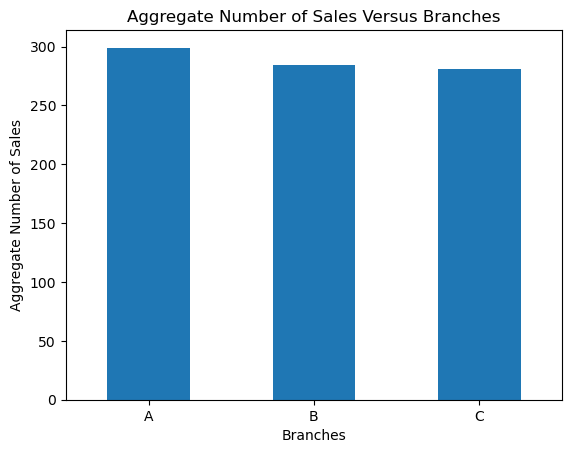

In [15]:
# Plotting a bar plot for aggregate number of sales versus branches.

data["Branch"].value_counts().plot(kind="bar")
plt.title("Aggregate Number of Sales Versus Branches")
plt.xlabel("Branches")
plt.ylabel("Aggregate Number of Sales")
plt.xticks(rotation="horizontal")
plt.show()

### Conclusion 1:

Branch A has the highest aggregate number of sales, followed by branch B and branch C.

### Analysis 2:

Analyzing the number of transactions for various payment methods.

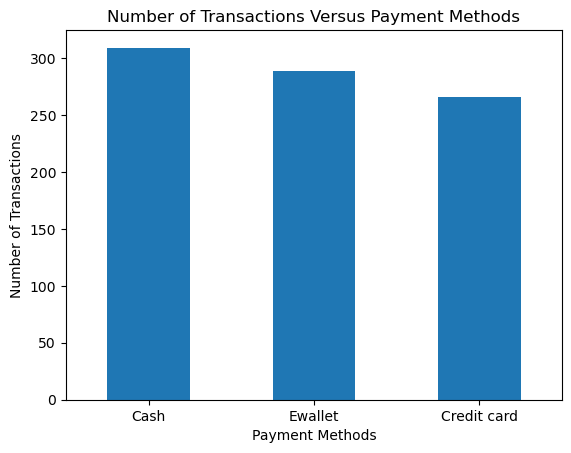

In [16]:
# Plotting a bar plot for number of transactions versus payment methods.

data["Payment"].value_counts().plot(kind="bar")
plt.title("Number of Transactions Versus Payment Methods")
plt.xlabel("Payment Methods")
plt.ylabel("Number of Transactions")
plt.xticks(rotation="horizontal")
plt.show()

### Conclusion 2:

Cash has the highest number of transactions, followed by ewallet and credit card.

### Analysis 3:

Analyzing the distribution of customer ratings.

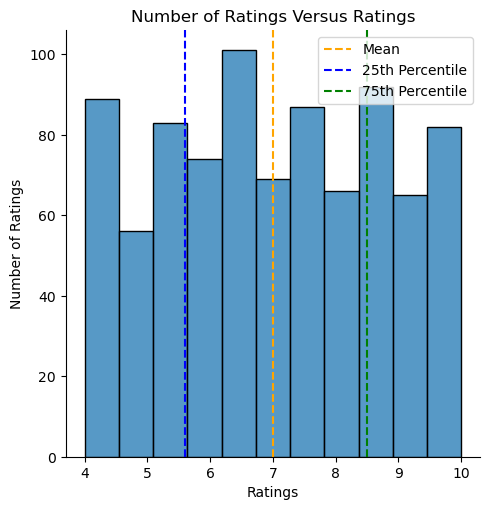

In [17]:
# Plotting a distribution plot for number of ratings versus ratings.

sns.displot(data["Rating"])
plt.title("Number of Ratings Versus Ratings")
plt.xlabel("Ratings")
plt.ylabel("Number of Ratings")
plt.axvline(np.mean(data["Rating"]), c="orange", ls="--", label="Mean")
plt.axvline(np.percentile(data["Rating"], 25), c="blue", ls="--", label="25th Percentile")
plt.axvline(np.percentile(data["Rating"], 75), c="green", ls="--", label="75th Percentile")
plt.legend()
plt.show()

### Conclusion 3:

Customer ratings are normally distributed.

## Bivariate Analysis

### Analysis 1:

Analyzing the distribution of gross incomes among various branches.

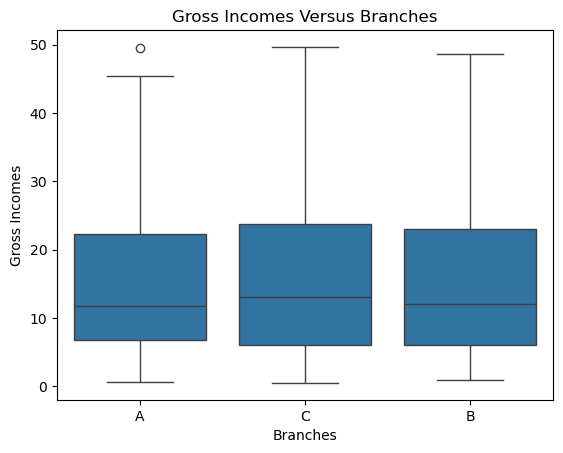

In [18]:
# Plotting a box plot for gross incomes versus branches.

sns.boxplot(x=data["Branch"], y=data["gross income"])
plt.title("Gross Incomes Versus Branches")
plt.xlabel("Branches")
plt.ylabel("Gross Incomes")
plt.show()

### Conclusion 1:

Branch C has the highest distribution of gross incomes, followed by branch B and branch A.

### Analysis 2:

Analyzing the distribution of gross incomes between genders.

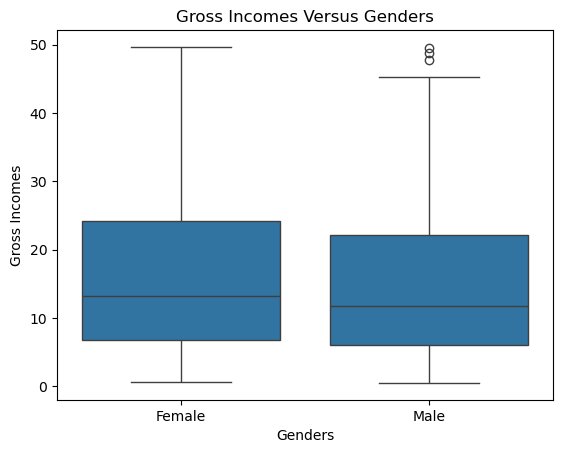

In [19]:
# Plotting a box plot for gross incomes versus genders.

sns.boxplot(x=data["Gender"], y=data["gross income"])
plt.title("Gross Incomes Versus Genders")
plt.xlabel("Genders")
plt.ylabel("Gross Incomes")
plt.show()

### Conclusion 2:

Females have a higher distribution of gross incomes than males.

### Analysis 3:

Analyzing the time trend in gross incomes.

In [20]:
# Assigning numerical columns into a Pandas DataFrame.

data_numerical = data.drop([column for column in data.columns if data[column].dtype == "object"], axis=1)

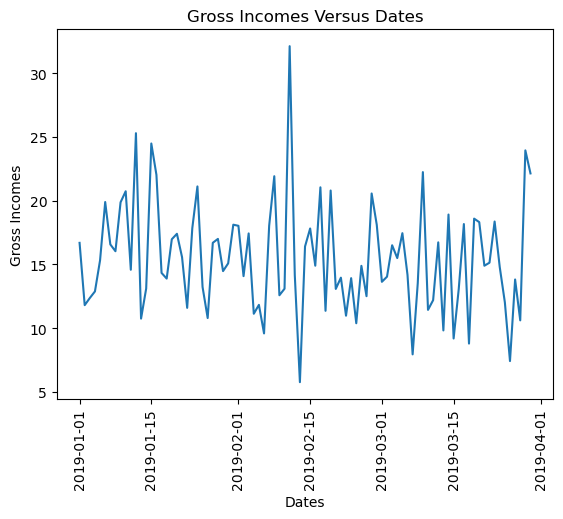

In [21]:
# Plotting a line plot for gross incomes versus dates.

sns.lineplot(x=data_numerical.groupby("Date").mean().index, y=data_numerical.groupby("Date").mean()["gross income"])
plt.title("Gross Incomes Versus Dates")
plt.xlabel("Dates")
plt.ylabel("Gross Incomes")
plt.xticks(rotation="vertical")
plt.show()

### Conclusion 3:

Gross incomes have no noticeable time trend.

### Analysis 4:

Analyzing the relationship between gross incomes and customer ratings.

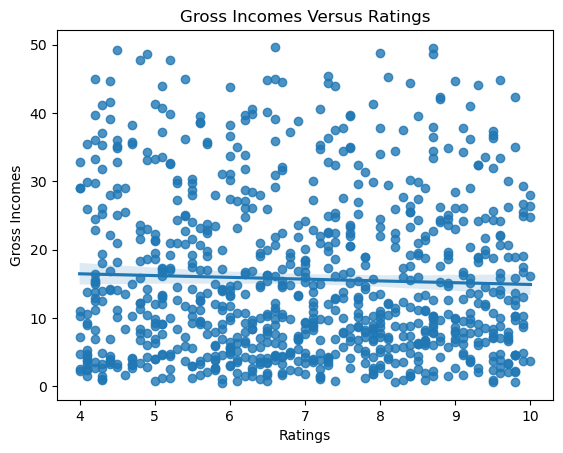

In [22]:
# Plotting a linear regression plot for gross incomes versus ratings.

sns.regplot(x=data["Rating"], y=data["gross income"])
plt.title("Gross Incomes Versus Ratings")
plt.xlabel("Ratings")
plt.ylabel("Gross Incomes")
plt.show()

### Conclusion 4:

Gross incomes and customer ratings are unrelated.

## Correlation Analysis

In [23]:
# Calculating pairwise correlation of columns.

data_numerical.drop("gross margin percentage", axis=1).corr()

,Unit price,Quantity,Tax 5%,Total,cogs,gross income,Rating
Unit price,1.000000,0.036617,0.652183,0.652183,0.652183,0.652183,-0.009980
Quantity,0.036617,1.000000,0.708537,0.708537,0.708537,0.708537,-0.016911
Tax 5%,0.652183,0.708537,1.000000,1.000000,1.000000,1.000000,-0.037947
Total,0.652183,0.708537,1.000000,1.000000,1.000000,1.000000,-0.037947
cogs,0.652183,0.708537,1.000000,1.000000,1.000000,1.000000,-0.037947
gross income,0.652183,0.708537,1.000000,1.000000,1.000000,1.000000,-0.037947
Rating,-0.009980,-0.016911,-0.037947,-0.037947,-0.037947,-0.037947,1.000000


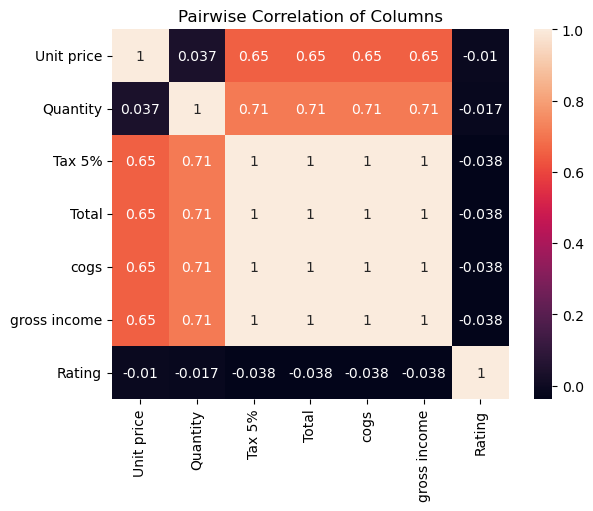

In [24]:
# Plotting a heatmap for pairwise correlation of columns.

sns.heatmap(data_numerical.drop("gross margin percentage", axis=1).corr(), annot=True)
plt.title("Pairwise Correlation of Columns")
plt.show()